## Scraping Data Analyst Job Listings from Indeed          

Web scraping is a process of gathering information from the internet for automating cumbersome tasks. The Python libraries, requests and Beautiful Soup are powerful tools to scrape data from the web. In this tutorial, we will build a web scraper that fetches data analyst job listings from the indeed website. For this, our scraper will parse the HTML code on the site to gather relevant information.   
Please note that it's important to read the terms of services for the website before scraping any of its data as some of the websites make it illegal to scrape data.            


In [98]:
#import libraries to be used
import pandas as pd
import requests as req
from bs4 import BeautifulSoup as bs

### A Quick Introduction to HTML and Beautiful Soup            

Before diving into the specific details for scraping data from Indeed, we will first learn about the basics of HTML. Generally, we need to scrape a part of the website that is written in HTML. A basic understanding of HTML will help us in identifying the HTML code that needs to be scrapped.               
Beautiful Soup is a Python library used to pull out the information from HTML and XML files. In this tutorial, we will use an HTML parser to read the content of Indeed website that is written in HTML. A basic introduction to Beautiful Soup will help us in understanding the tree structure of Python objects in Beautiful Soup. First, let's start with the basics of HTML.      


#### HTML Basics             

Hypertext markup language, or in short HTML is a formatting system for displaying material retrieved over the Internet. Using this language users can create and structure sections, paragraphs, and links using elements, tags, and attributes. Web browser such as Chrome reads these elements, tags, and attributes to display the content of the document in a human-readable language (English). A simple structure of the HTML page is given in the figure below.        

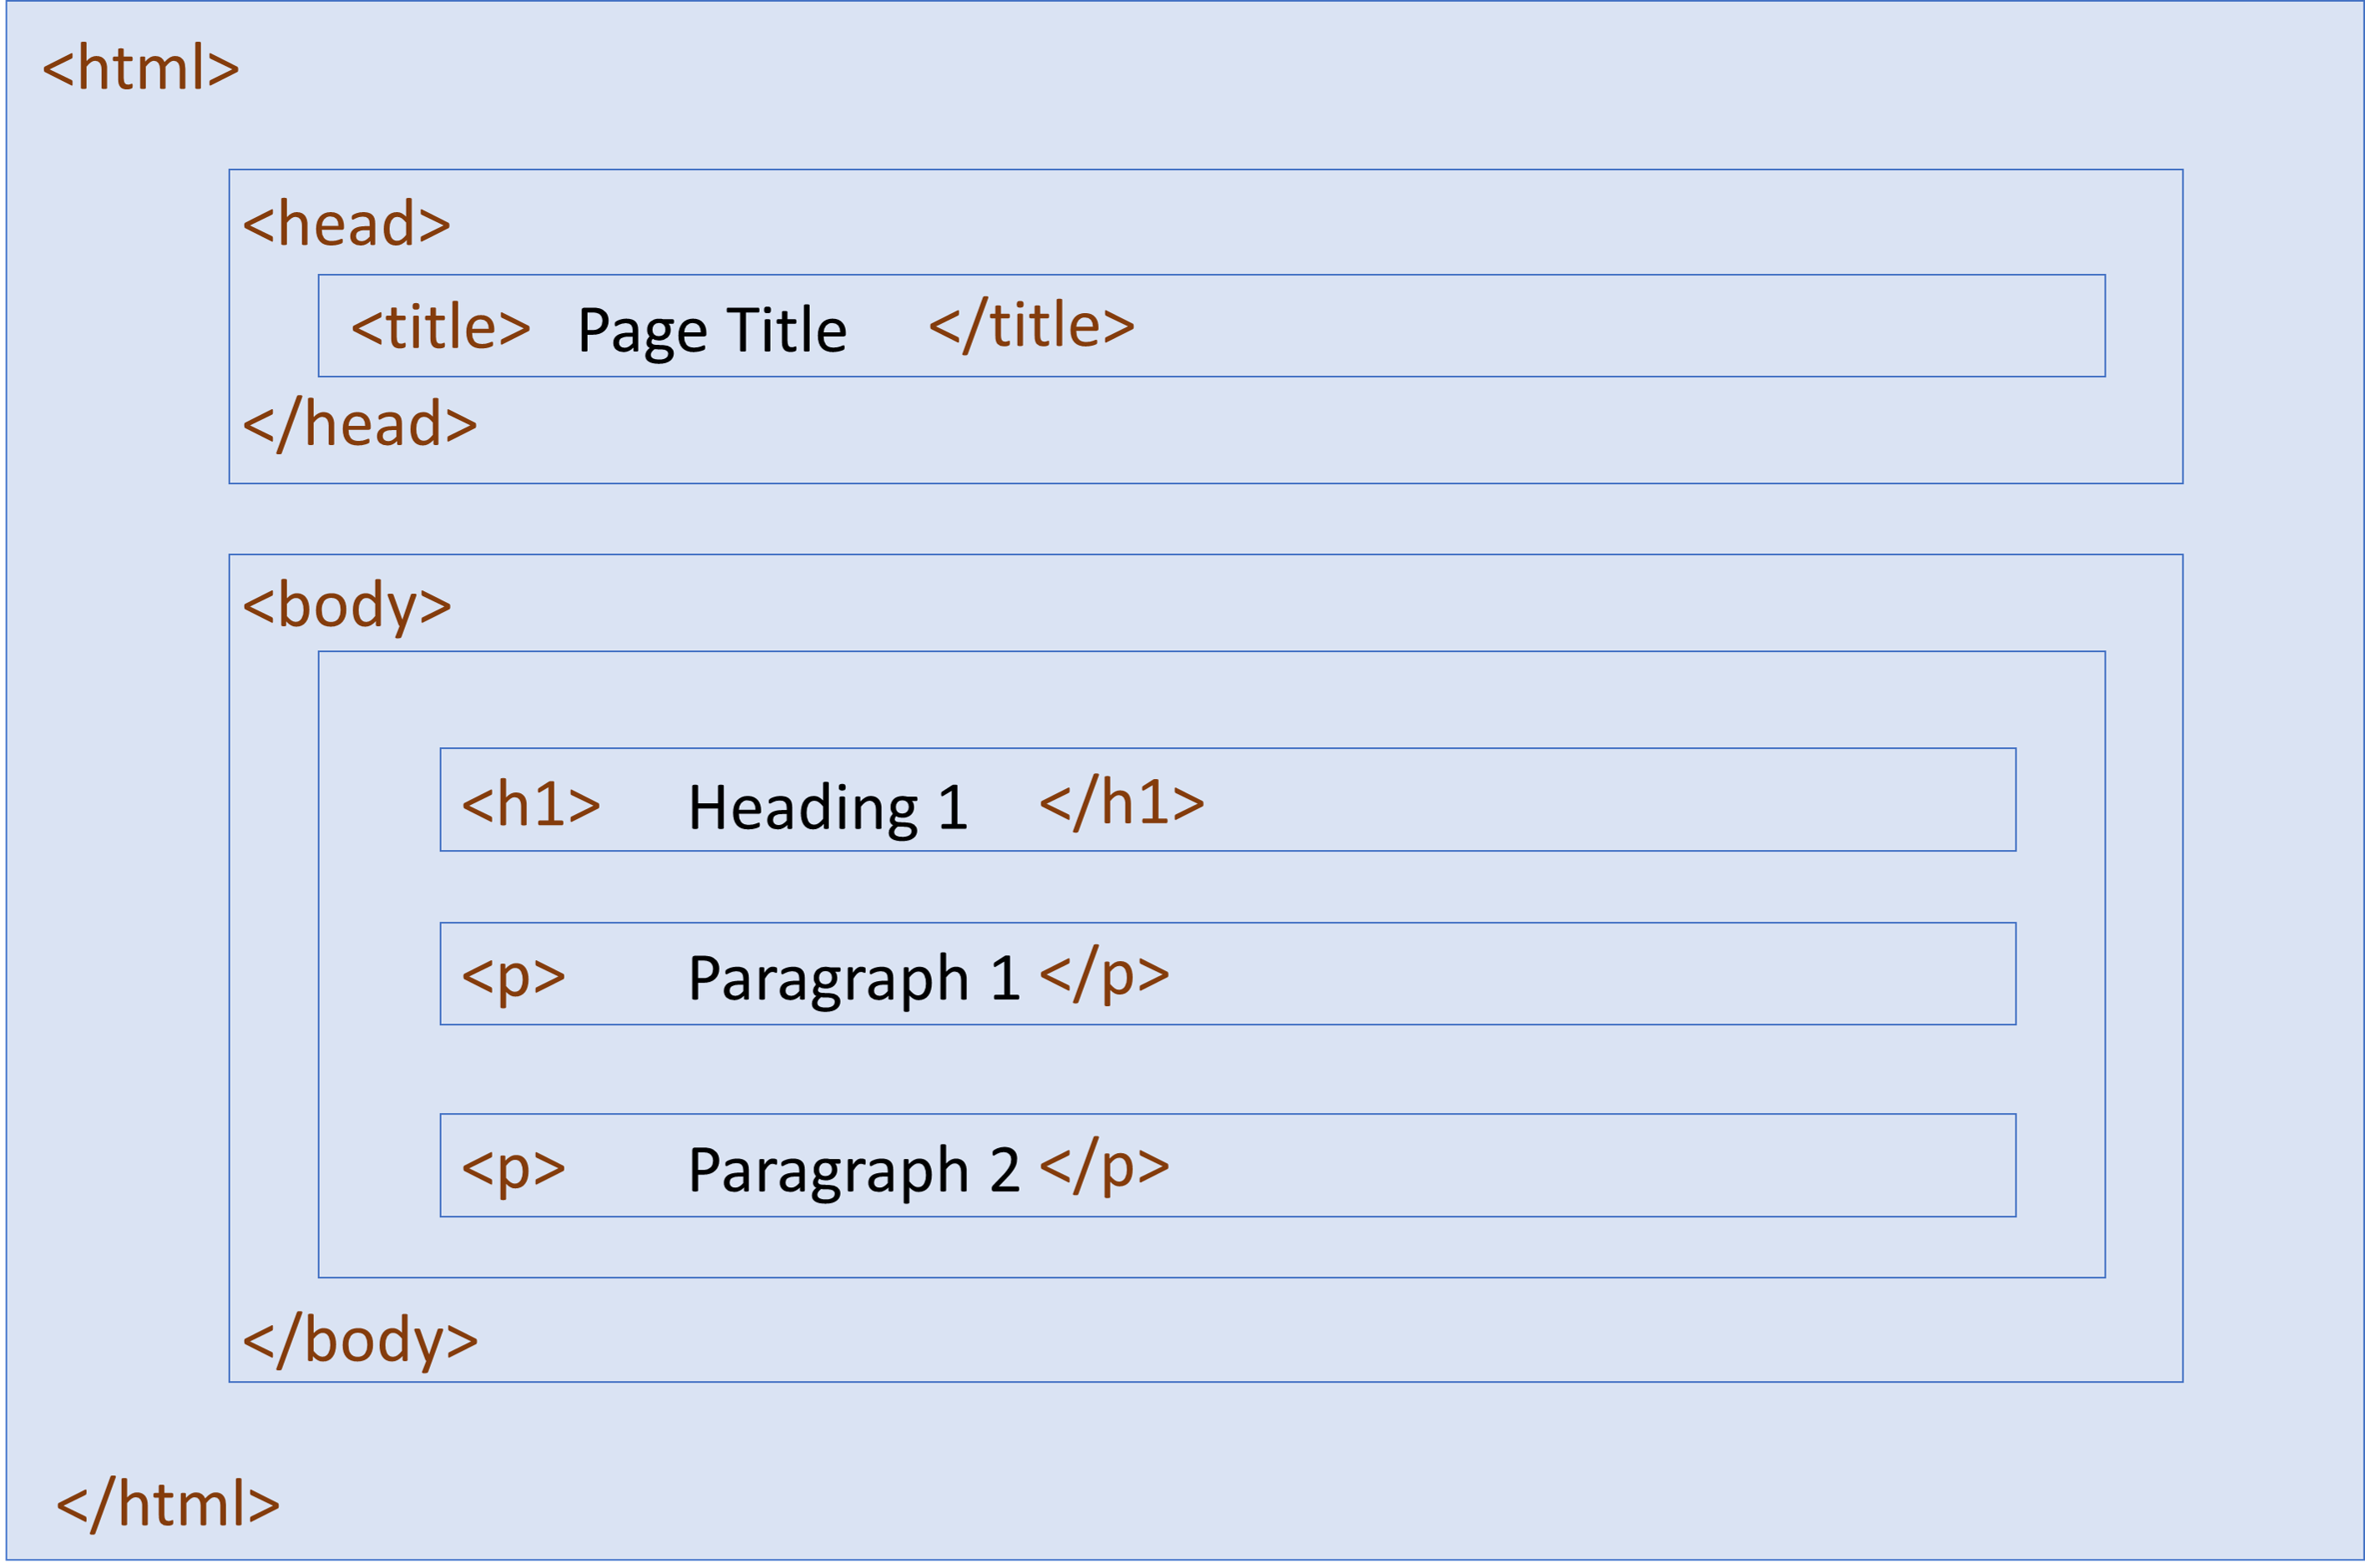           

Let's copy this code in notepad and save the notepad file as page.html. When we open the page.html file in google chrome, it looks like this.            
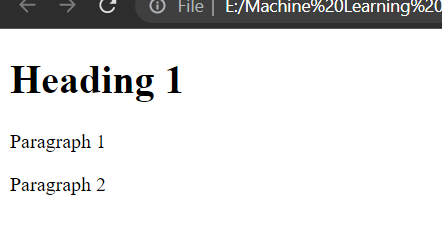            

Okay but what is a tag, element, and attribute in HTML.            

##### Tag:                 
A tag is a hidden keyword within a web page that defines how the web browser must format and display the content. HTML has tags for headlines, paragraphs, references, tables, and titles, etc. A tag contains its name in angular brackets and may come in pairs, which makes up the beginning and ending tag that defines a particular piece of code, text, or other tags. In the figure above, every keyword contained in <> is a tag and has a specific purpose. For instance, tag <\h1> is used to define level one headings in HTML. (Using \ to stop notebook from interpreting HTML)        
    
##### Element:          
An HTML element is everything between the start tag to the end tag. In the figure above, '<\h1> Heading 1 <\/h1>' is an element.            

##### Attribute:          
An element in HTML can have attributes to provide additional information about it. Attributes are always defined in the start tag and usually come in name/value pairs. For example, in the latter code, a style attribute can be used with <\p> tag to give this element additional properties. The line below will print the text of paragraph 1 in blue color.          

   <\p style='color:blue;' > Paragraph 1 <\/p>              
   
Two of the most important attributes that come in handy while scraping web content are class and id. 
Let's say we want to have the same style for multiple elements (for this example, same text color for multiple paragraphs). This can be done either by putting style attribute multiple times for each of the elements or by defining a class at the beginning and using it as an attribute for all the elements. The latter method is more efficient. So a single class called style can be used for both paragraph 1 and paragraph 2 in the following manner:              

 <\p class='style' > Paragraph 1 <\/p>                  
 
Similarly, the id attribute is used to specify a unique id for an element to provide it with additional properties. Id and class are used in a similar fashion for an element except that a class name can be used by multiple elements, while an id name must only be used by one HTML element within the page.

#### Beautiful Soup Basics         

To understand the basic methods and objects of Beautiful Soup, let's use the HTML code shown in the first figure. I have added a few classes and links to this code to better understand the parsing and object creation process in Beautiful Soup. Our final HTML code looks like this and is assigned to html_code variable.     
Now, let's parse this HTML code using Beautiful Soup's html parser.     

In [103]:
html_code = """
<html>
<head>
<title>Page Title</title>
<head>
<body>
<h1>Heading 1/h1>
<p class="style">Paragraph 1</p>
<p class="style">Paragraph 2</p>
<a href="https://www.google.com/" class="Alphabet" id="link1">Google</a>
<a href="https://www.google.com/doodles" class="Alphabet" id="link2">Doodle</a>
</body>
</html>"""

In [105]:
#The soup object is a tree of complex Python objects. 
#Some of the important objects that are used while web scraping are described here.
soup = bs(html_code, "html.parser")

In [116]:
s = bs(r'<p class="style">Paragraph 1</p>', "html.parser")

##### Tag:         
A tag object corresponds to the HTML tag in the document. This object is an attribute (child) of the soup object and contains the element associated with the HTML tag.          
A tag may contain other tags (elements). These elements are called tag's children. We can navigate these children using the chaining of attributes.

In [121]:
print(s.p)
print(type(s.p))

<p class="style">Paragraph 1</p>
<class 'bs4.element.Tag'>


##### Attributes:                 
A tag can have multiple number of attributes. These attributes can be a single valued attribute (for example, id attribute in HTML) or they can be multi-valued attributes (for example, class attribute in HTML). You can access the attributes for a tag by treating it like a dictionary. The values of multi-vlaued attributes are returned in a list.                  


In [138]:
print(soup.a['id'])
print(soup.a['class'])

link1
['Alphabet']


We can see from these examples that we can access only one html tag using the .attribute method. To get all tags with the same name, we can use beautiful soup's find_all function. In the example below, find_all function returns a list of tags with name a.               
We can pass different arguments to find_all function to select out specific tags.

In [139]:
soup.find_all('a')

[<a class="Alphabet" href="https://www.google.com/" id="link1">Google</a>,
 <a class="Alphabet" href="https://www.google.com/doodles" id="link2">Doodle</a>]

In [143]:
print(soup.find_all('a', attrs={'href':'https://www.google.com/'}))
print(soup.find_all('a', attrs={'id':'link2'}))
print(soup.find_all('p', attrs={'class':'style'}))

[<a class="Alphabet" href="https://www.google.com/" id="link1">Google</a>]
[<a class="Alphabet" href="https://www.google.com/doodles" id="link2">Doodle</a>]
[<p class="style">Paragraph 1</p>, <p class="style">Paragraph 2</p>]


### Scrape the Indeed job website to get insight into jobs            
In this tutorial, we will build a web scraper that fecthes data analyst job listing from the indeed website. For this, our scraper will parse the HTML on the site to pick out the relevent information and filter that content for specific words.       
#### Explore the website          
First, we have to understand the structure of website in order to scrape the data that is relevent to us. On the Indeed website we can see the user interface as shown in figure below. Also, we can see that when we interact with the website, URL for the website changes. For this tutorial, I am searching for Data Analyst job listings in the city of Toronto within a radius of 100 km.        

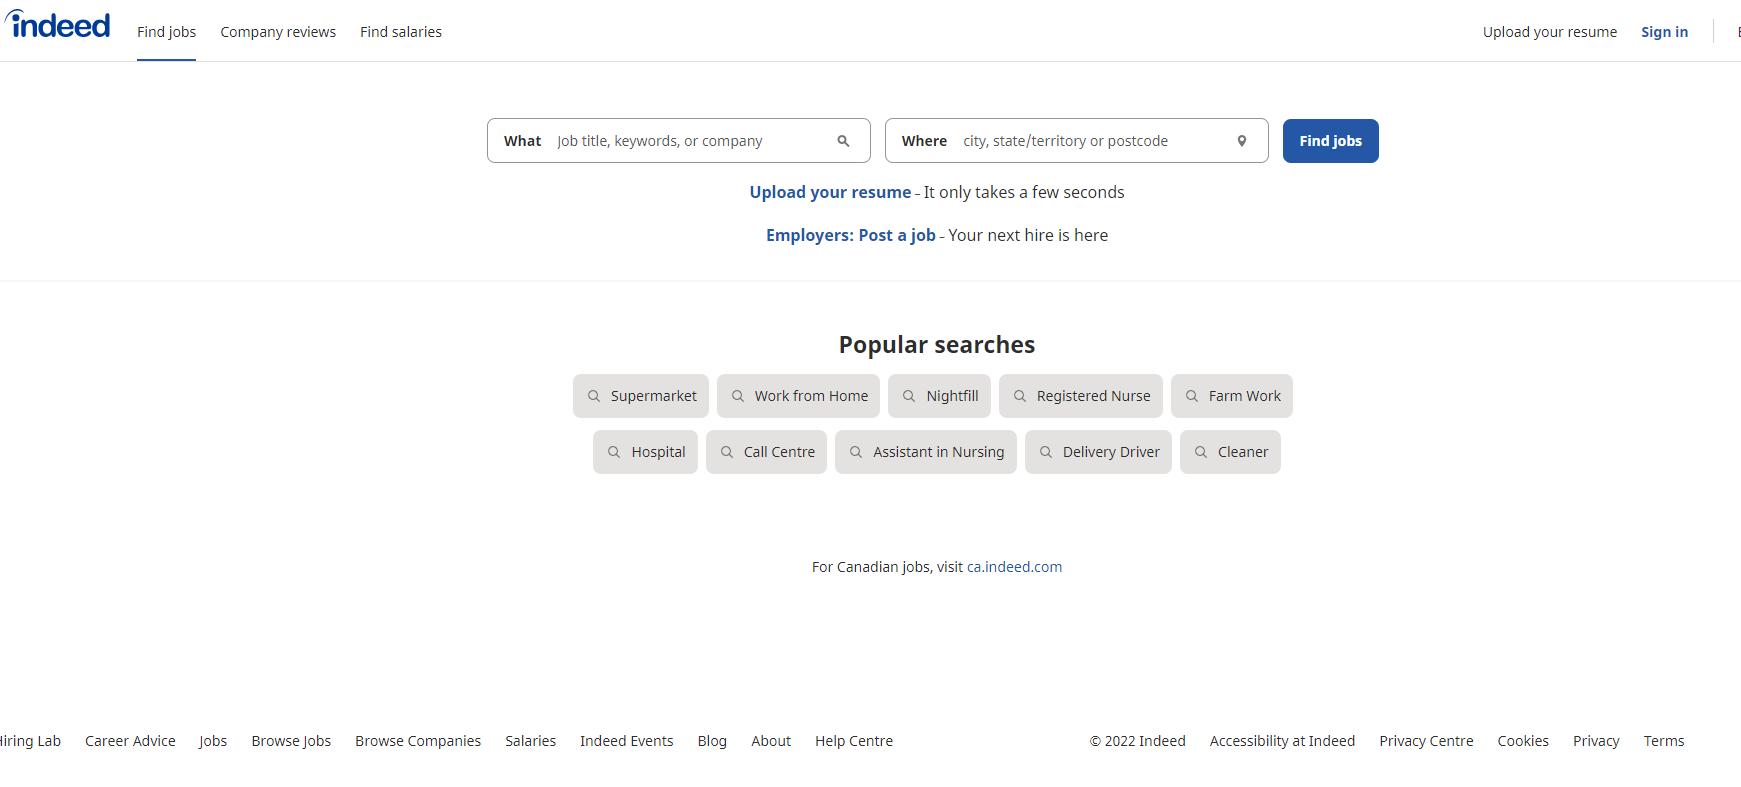

Let's see the job postings related to data analyst jobs in Toronto. We get the following link when we query this data.            
https://ca.indeed.com/jobs?q=data%20analyst&l=Toronto%2C%20ON&vjk=b038e0902d2b6069            
This link has two components             
1. The base URL: this represents the path to the search fnctionality of the website. In the above example, the base url is https://ca.indeed.com/jobs           
2. Query parameter: This encodes values of the serach by user. This can be think of as a query string that is sent to the database to retrieve specific words.  \         
Query parameters have three components:               
i. Start: The beginning of the query parameter is denoted by a question mark(?)           
ii. Information: The pieces of information constituting one query parameter are encoded in key-value chain pair, wher related keys and values are joined together by an equal sign (key=value)         
iii. Separator: A URL can have multiple query parameters, separated by an ampersand symbol(&).      
So in the above link first query selects the type of job (q=data%20analyst)           
The second query selects the location for the job (l=Toronto%2C%20ON)                  

##### Inspect the website using developer tool            
Here we have to understand the page structure in order to pick the information we want. Open the web developer tool in python and explore different parts of the page using the developer tool.
 


In [159]:
URL = 'https://ca.indeed.com/jobs?q=%22data%20Analyst%22&l=Toronto%2C%20ON&radius=100&vjk=2df6fdc95e751077'
page = req.get(URL) #get request to the URL and store the content of URL in python object page


In [ ]:
#parse the html text in page object using beautifulsoup's html parser
soup = bs(page.text, "html.parser")

When we inspect this page, we can see in the figure below that part of the job card with information (company name, job title, location, and salray) is located within 'td' tag and class 'resultContent'. Let's store data from this card in a list named res. This list stores data for all the jobs.            
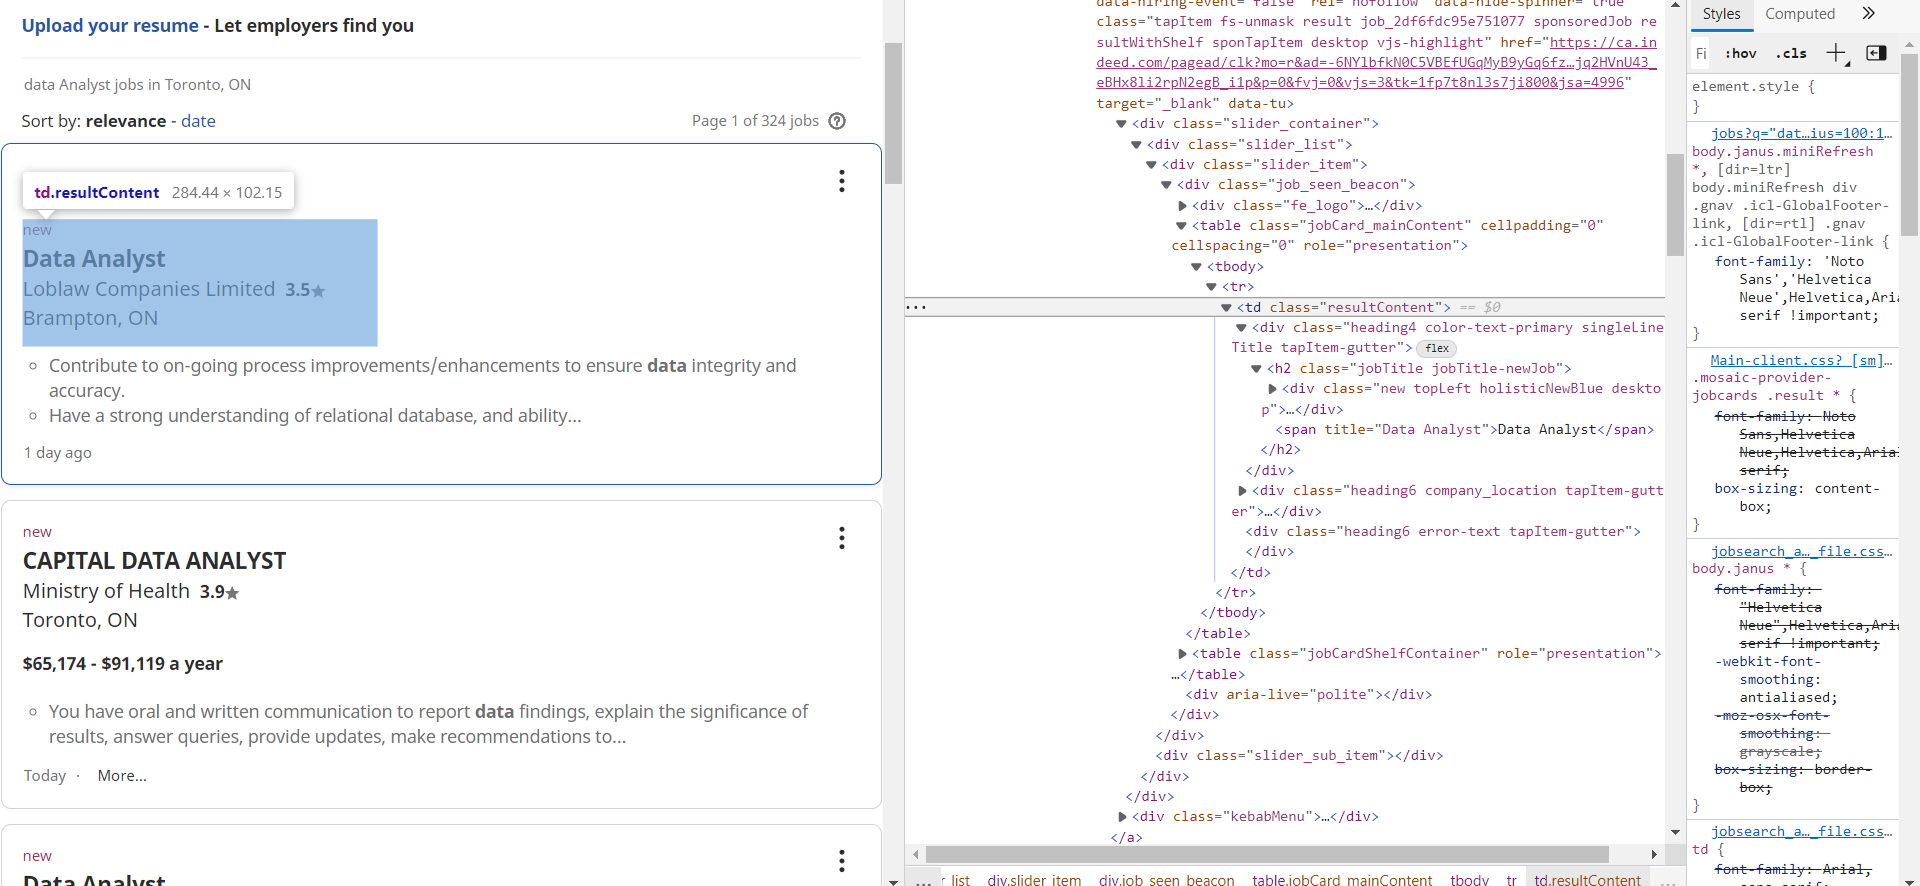    


In [162]:
#store data from this card in a list res
res = soup.find_all('td', 'resultContent')

Now let's find out the part of HTML code which represents the job title for first job. When we hover mouse on job title and right click to inspect, we can see that the job title is located as a string in span tag which is a child of h2 tag. Further, h2 tag is a child of td tag.               
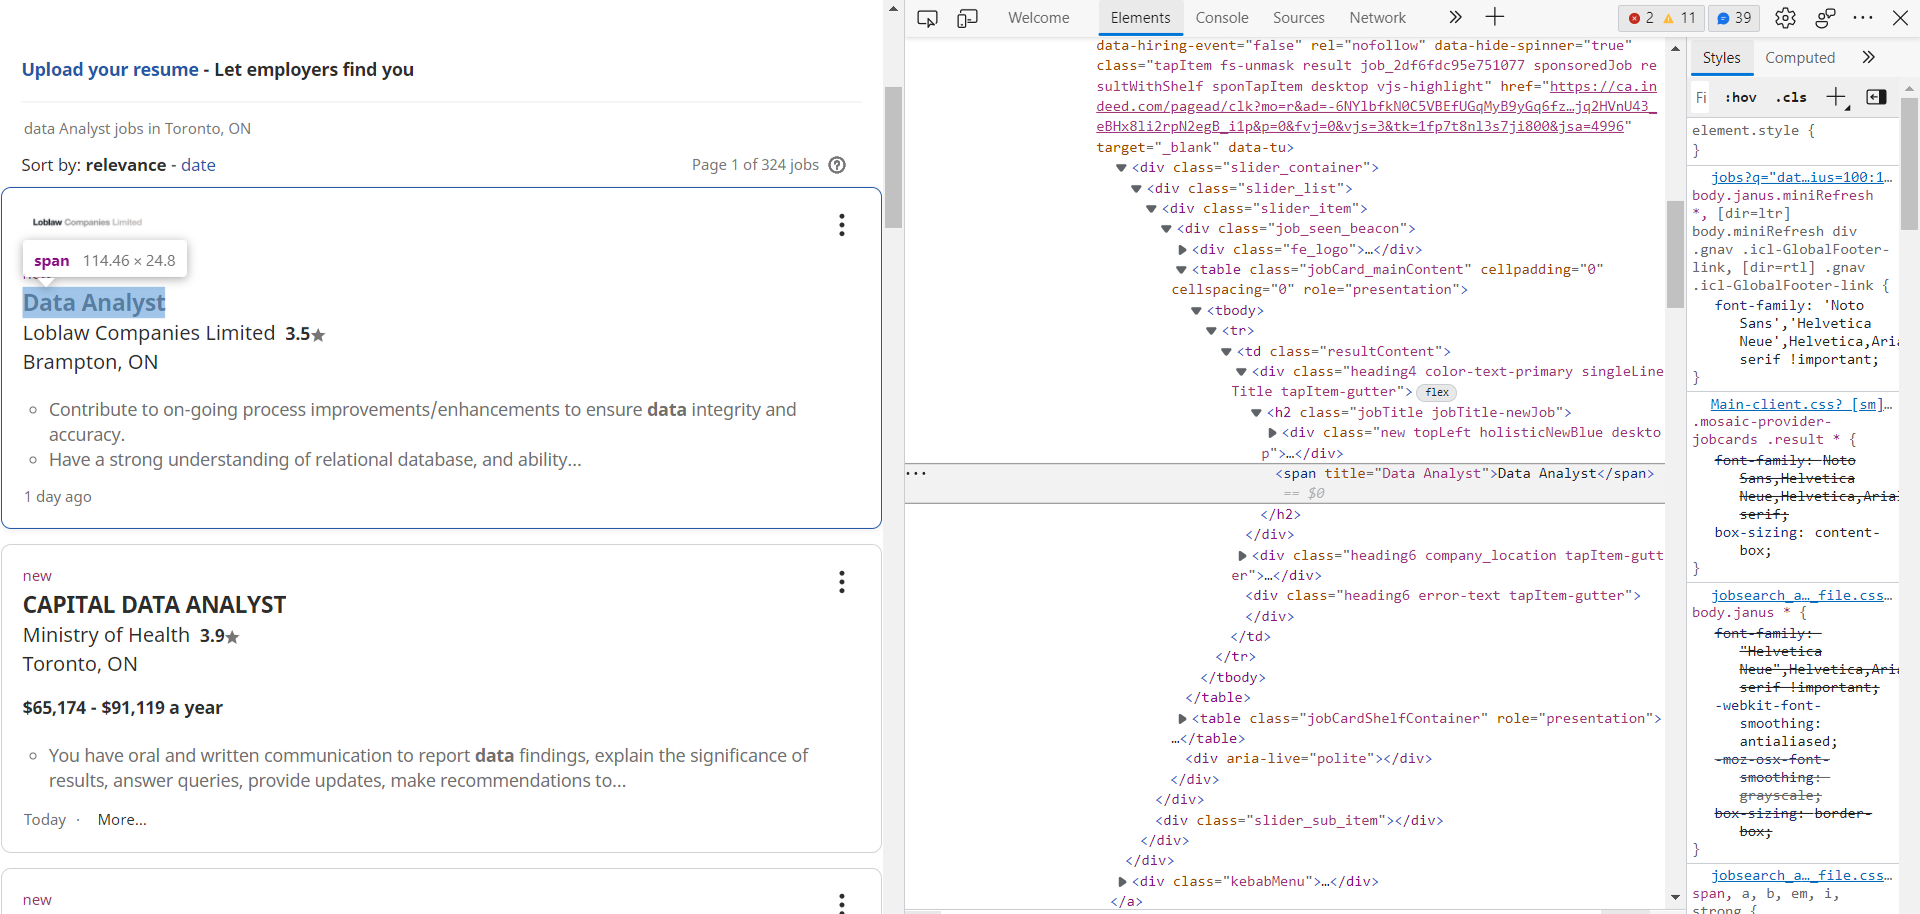

In [163]:
#job title is located as a string in span tag which is a child of h2 tag. h2 tag is child of td tag.
#similarly company name is located as a string in span tag which is child of pre tag. pre tag is child of td tag
#We can find the tags for different variables in a similar fashion.
print(res[0].find('h2').text.replace('new','')) #job title
print(res[0].pre.span.string) #company name
print(res[5].find('div', 'salary-snippet').get('aria-label')) #salary 
print(soup.find_all('span', 'date')[0].text) #job posting date

Data Analyst
Loblaw Companies Limited
$22.65 to $24.56 an hour
Posted1 day ago


Here, res[0] gives us information about the job title, company, location, and salary. res[0].find('h2') gives us the element associated with h2 tag. Finally, res[0].find('h2').text gives us the string part of the element. The string contains two parts new and job title. We can remove 'new' form it using the replace function.      
Similarly, we can find tags associated with job location, salary, company name, and job posting date.   

Here note that I used res[5] to get the salary, this is because first card does not have any salary mentioned so I used the sixth card. Also, job posting date is located at the bottom of the card, so I used the soup object to find all the span tags that have date class.                  
Now, we have an idea about how to get the required information for a single card. Let's get the information for all the cards on a single page. To do this, we can loop through all the elements of list 'res' that contains information about the cards on single page. The function one_page() is implemented for this purpose.

In [165]:
res[0].find('h2').text

'newData Analyst'

In [86]:
#let us store the result of each variable for every job on a page in a list
job_title = []
company = []
location = []
salary = []
date = []
def one_page(res, job_title, company, location, salary, date):
    for element in res:
        job_title.append(element.find('h2').text.replace('new',''))
        company.append(element.pre.span.string)
        location.append(element.find('div', 'companyLocation').text)
        try:
            salary.append(element.find('div', 'salary-snippet').get('aria-label'))
        except AttributeError:
            salary.append('')
    for dat in soup.find_all('span', 'date'):
        date.append(dat.text)
    return (job_title, company, location, salary, date)

In [87]:
#data for one page
print(job_title)
print(company) 
print(location) 
print(salary)
print(date) 

[]
[]
[]
[]
[]


In [88]:
#let's collect data for all the pages (i am collecting data for first 29 pages). If you want
#to collect data for all the pages you can use while loop instead of for loop.
for i in range(20):
    one_page(res, job_title, company, location, salary, date)
    try:
        url = 'https://ca.indeed.com' + soup.find_all('a', {'aria-label':'Next'})[0].get('href')
    except:
        break
    page = req.get(url)
    soup = bs(page.text, "html.parser")
    res = soup.find_all('td', 'resultContent')

In [92]:
#This data contains total 270 values 
len(job_title)

270

In [94]:
#store data for data analyst jobs in Toronto in a data frame
df_jobs = pd.DataFrame(data={'Job_title':job_title, 'Company':company, 'Location':location, 'Salary':salary, 'Date':date})

In [96]:
df_jobs.head()

,Job_title,Company,Location,Salary,Date
0,Data Analyst,LotLinx,"Toronto, ON+1 location•Remote","$70,000 to $85,000 a year",Posted30+ days ago
1,Business Analyst/Data Analyst SQL Tableau/Powe...,CorGTA Inc.,"Toronto, ON•Temporarily Remote","$85,000 to $95,000 a year",Posted8 days ago
2,Data Analyst/ Specialist,Manpower,"Toronto, ON",$17 to $22 an hour,Posted6 days ago
3,Profit and Data Analyst,UPS SCS Inc.,"Mississauga, ON•Remote",$22.65 to $24.56 an hour,Posted6 days ago
4,Data Analyst,EDAC INC.,"Markham, ON•Temporarily Remote","$46,000 to $65,000 a year",Posted6 days ago


In [97]:
#export data to csv for later use
df_jobs.to_csv(r'E:\Machine Learning Engineer\Medium Articles\Beautiful Soup\job_data.csv')